In [92]:
%pylab inline
import matplotlib.pyplot as plt

from __future__ import print_function
import keras
from keras.datasets import mnist, cifar100
from keras.models import Sequential, load_model, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Deconv2D, Conv2DTranspose, UpSampling2D
from keras import backend as K
from keras.preprocessing import image
from keras.engine import Input


Populating the interactive namespace from numpy and matplotlib


In [4]:
model = load_model("my_model.h5")

In [24]:
img = image.load_img("trojka.png", target_size=(28, 28))
img = image.img_to_array(img)[:, :, 0]
print(img.shape)
imgs = np.expand_dims(img, axis=0)
imgs = np.expand_dims(imgs, axis=3)
# image.
print(imgs.shape)
model.predict(imgs)

(28, 28)
(1, 28, 28, 1)


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

# Coloring 

In [74]:
import h5py

(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')
type(x_train)
x_train.shape

(50000, 32, 32, 3)

### Save to h5 file

In [75]:
f = h5py.File("cifar100.h5")
if "x_train" not in f.keys():
    f.create_dataset("x_train", x_train.shape, dtype=x_train.dtype)
f["x_train"][:] = x_train

if "y_train" not in f.keys():
    f.create_dataset("y_train", y_train.shape, dtype=y_train.dtype)
f["y_train"][:] = y_train

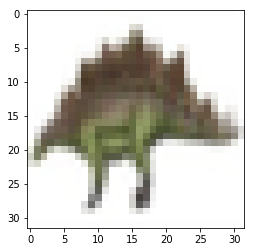

In [76]:

plt.imshow(f["x_train"][1])

In [77]:
f.close()

In [78]:
f = h5py.File("./cifar100.h5")

In [79]:
f["y_train"][1]

array([29])

## Prepare gray scale image dataset

In [80]:
import skimage

x_train_gray = skimage.color.rgb2gray(x_train)
y_train = (x_train / 255.0).astype(np.float32)

In [97]:
x_train_gray = np.expand_dims(x_train_gray, -1)

In [103]:
x_test_gray = skimage.color.rgb2gray(x_test)
x_test_gray = np.expand_dims(x_test_gray, -1)

## Create CNN

In [100]:
# Downsampling
x = Input(shape=(32,32,1))
conv1 = Conv2D(32, (3, 3), padding="same", activation="relu")(x)
maxpool1 = MaxPooling2D()(conv1)
conv2 = Conv2D(32, (3, 3), padding="same", activation="relu")(maxpool1)
maxpool2 = MaxPooling2D()(conv2)
conv3 = Conv2D(32, (3, 3), padding="same", activation="relu")(maxpool2)
maxpool3 = MaxPooling2D()(conv3)

# Upsampling
deconv1 = Conv2DTranspose(32, (2, 2), strides=(2, 2), activation="relu")(maxpool3)
upsample1 = UpSampling2D()(deconv1)

deconv2 = Conv2DTranspose(32, (2, 2), strides=(1, 1), activation="relu", padding="same")(upsample1)
upsample2 = UpSampling2D()(deconv2)

convreg = Conv2D(3, (1, 1), activation="sigmoid")(upsample2)

model=Model([x], [convreg])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 4, 4, 32)          0         
__________

In [101]:
opt = keras.optimizers.SGD(lr=0.01, momentum=0.9, decay=0.0, nesterov=False)
model.compile(opt, loss="mse")

### One epoch

In [102]:
model.fit(x_train_gray, y_train, batch_size=256, epochs=1)

Epoch 1/1
50000/50000 [==============================] - 232s 5ms/step - loss: 0.0709


In [106]:
x_train_gray.shape

(50000, 32, 32, 1)

In [107]:
x_test_one = np.expand_dims(x_test_gray[0], 0)

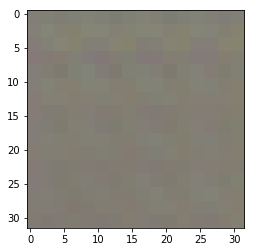

In [111]:
y_test_one = model.predict(x_test_one)
plt.imshow(y_test_one[0])

### 10 epochs

In [112]:
model.fit(x_train_gray, y_train, batch_size=256, epochs=10)

Epoch 1/10
50000/50000 [==============================] - 189s 4ms/step - loss: 0.0685
Epoch 2/10
50000/50000 [==============================] - 134s 3ms/step - loss: 0.0615
Epoch 3/10
50000/50000 [==============================] - 153s 3ms/step - loss: 0.0463
Epoch 4/10
50000/50000 [==============================] - 230s 5ms/step - loss: 0.0360
Epoch 5/10
50000/50000 [==============================] - 227s 5ms/step - loss: 0.0332
Epoch 6/10
50000/50000 [==============================] - 221s 4ms/step - loss: 0.0316
Epoch 7/10
50000/50000 [==============================] - 220s 4ms/step - loss: 0.0303
Epoch 8/10
50000/50000 [==============================] - 1335s 27ms/step - loss: 0.0291
Epoch 9/10
50000/50000 [==============================] - 230s 5ms/step - loss: 0.0280
Epoch 10/10
50000/50000 [==============================] - 243s 5ms/step - loss: 0.0271


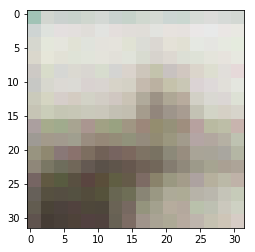

In [113]:
y_test_one = model.predict(x_test_one)
plt.imshow(y_test_one[0])